In [ ]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
from glob import glob

In [ ]:
%%capture
!apt-get install libav-tools -y

In [ ]:
!wget -q --show-progress https://dropbox.com/s/4jw31k5mlzcmgis/generes.tar.gz?dl=0

generes.tar.gz?dl=0 100%[===================>]   1.14G  79.7MB/s    in 14s     


In [ ]:
!unzip -qq generes.tar.gz?dl=0      # this method does not work with .tar.gz files

[generes.tar.gz?dl=0]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of generes.tar.gz?dl=0 or
        generes.tar.gz?dl=0.zip, and cannot find generes.tar.gz?dl=0.ZIP, period.

No zipfiles found.


In [ ]:
!tar -xvzf generes.tar.gz?dl=0

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
!rm generes.tar.gz?dl=0 # cleaning the directory

In [ ]:
!pip install path

In [ ]:
from keras import layers
from keras import models
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
from path import Path

In [ ]:
# this need to be just one folder initialy which will contain all
# the processed data and then that will be split later on in train
# and test folder

import os
os.mkdir('full_data')
# os.mkdir('train')
# os.mkdir('test')

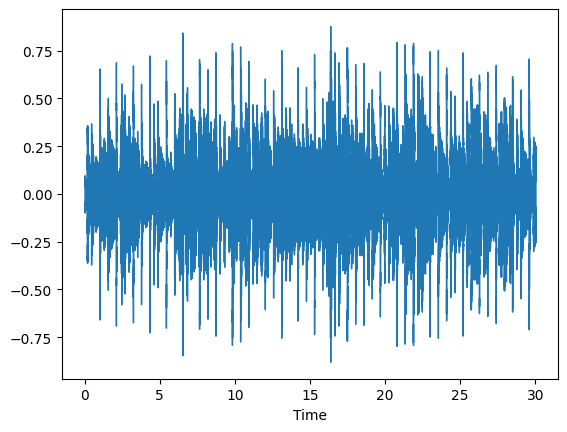

In [ ]:
filename = '/content/genres/rock/rock.00089.au'
y, sr = librosa.load(filename)

# trim silent edges
sample_sound, _ = librosa.effects.trim(y)
# waveplot has been changed to waveshow in the latest version
librosa.display.waveshow(sample_sound, sr=sr)

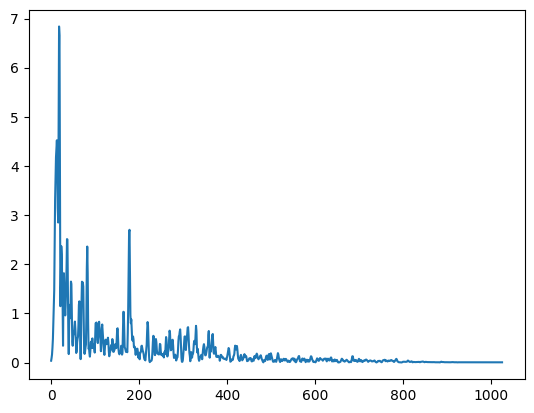

In [ ]:
# applying fft to the data
n_fft = 2048
D = np.abs(librosa.stft(sample_sound[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D)

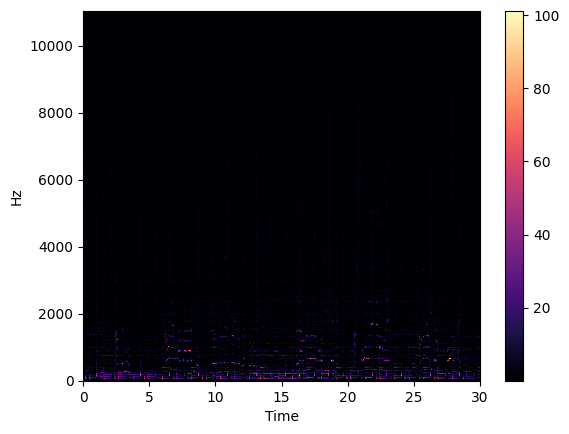

In [ ]:
hop_length = 512
D = np.abs(librosa.stft(sample_sound, n_fft=n_fft, hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar()

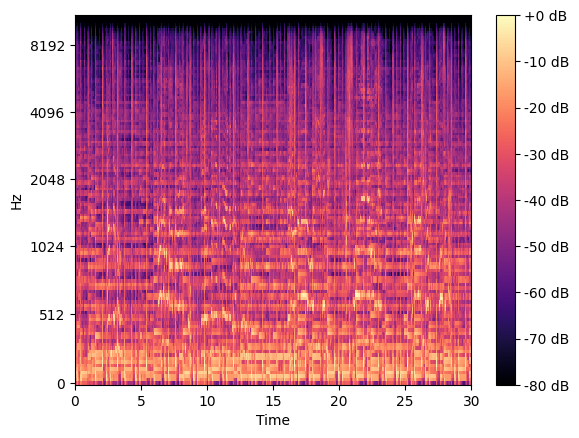

In [ ]:
# this is for just 1 file.

S = librosa.feature.melspectrogram(y=sample_sound, n_fft=n_fft, hop_length=hop_length)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [ ]:
folder_list = list(glob('./genres/*'))

In [ ]:
folder_list

['./genres/classical',
 './genres/hiphop',
 './genres/disco',
 './genres/jazz',
 './genres/metal',
 './genres/reggae',
 './genres/rock',
 './genres/country',
 './genres/blues',
 './genres/pop']

In [ ]:
files = []

for folder in folder_list:
  files += glob(folder+'/*')

In [ ]:
files

['./genres/classical/classical.00081.au',
 './genres/classical/classical.00005.au',
 './genres/classical/classical.00065.au',
 './genres/classical/classical.00092.au',
 './genres/classical/classical.00095.au',
 './genres/classical/classical.00020.au',
 './genres/classical/classical.00071.au',
 './genres/classical/classical.00002.au',
 './genres/classical/classical.00006.au',
 './genres/classical/classical.00060.au',
 './genres/classical/classical.00079.au',
 './genres/classical/classical.00016.au',
 './genres/classical/classical.00028.au',
 './genres/classical/classical.00086.au',
 './genres/classical/classical.00054.au',
 './genres/classical/classical.00032.au',
 './genres/classical/classical.00064.au',
 './genres/classical/classical.00059.au',
 './genres/classical/classical.00061.au',
 './genres/classical/classical.00022.au',
 './genres/classical/classical.00000.au',
 './genres/classical/classical.00098.au',
 './genres/classical/classical.00082.au',
 './genres/classical/classical.000

In [ ]:
# creating features from the files

def create_spectogram(filename, name):
  plt.interactive(False)
  clip, sample_rate = librosa.load(filename, sr=None)
  fig = plt.figure(figsize=[0.72,0.72])
  ax = fig.add_subplot(111)
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
  librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
  filename = '/content/full_data/' + name + '.jpg'
  plt.savefig(filename, dpi=400, bbox_inches='tight', pad_inches=0)
  plt.close()
  fig.clf()
  plt.close(fig)
  plt.close('all')
  del filename, name,clip, sample_rate, fig, ax, S

In [ ]:
for i, file in enumerate(files):
  if i%10 == 0: print(len(files) - i)
  filename, name = file, file.split('/')[-1].split('.')[0] +'_'+file.split('/')[-1].split('.')[1]
  # print(filename,name)
  create_spectogram(filename, name)

1000
990
980
970
960
950
940
930
920
910
900
890
880
870
860
850
840
830
820
810
800
790
780
770
760
750
740
730
720
710
700
690
680
670
660
650
640
630
620
610
600
590
580
570
560
550
540
530
520
510
500
490
480
470
460
450
440
430
420
410
400
390
380
370
360
350
340
330
320
310
300
290
280
270
260
250
240
230
220
210
200
190
180
170
160
150
140
130
120
110
100
90
80
70
60
50
40
30
20
10


In [ ]:
# create 2 directories with the name train and test
os.mkdir('train')
os.mkdir('test')

In [ ]:
#  transfer the files from full_data to these 2 folder with respective genres in each
# need to make sure the test folder contain random sample of files from full_data
# going to split the full_data in 9:1 (train:test) randomly, as the data for each genre is not sufficient
for cl in folder_list:
  # print(cl.split('/')[2])
  os.mkdir('/content/train/' + cl.split('/')[2])
  os.mkdir('/content/test/' + cl.split('/')[2])

In [ ]:
class_dict_map = {x.split('/')[2]:'./train/' + x.split('/')[2] + '/' for x in folder_list}

In [ ]:
class_dict_map

{'classical': './train/classical/',
 'hiphop': './train/hiphop/',
 'disco': './train/disco/',
 'jazz': './train/jazz/',
 'metal': './train/metal/',
 'reggae': './train/reggae/',
 'rock': './train/rock/',
 'country': './train/country/',
 'blues': './train/blues/',
 'pop': './train/pop/'}

In [ ]:
import shutil

In [ ]:
for file in files:
  genre = file.split('.')[1].split('/')[2]
  file_num = file.split('.')[2]
  name = genre + '_'+ file_num + '.jpg'
  # print(name)
  shutil.move('/content/full_data/' + name,
              class_dict_map[genre] + name)

In [ ]:
# will do this straight forward but need to run the code to see if things are working fine or not
for folder in class_dict_map.values():
  for file in list(glob(folder+'/*')):
    num = file.split('_')[1].split('.')[0]
    if int(num)%10 == 0:
      # print(folder, file)
      dirc = file.split('/')[2]
      name = file.split('/')[3]
      shutil.move(file,
              './test/'+ dirc + '/' + name)

# could have done the same as in the above cell

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
WIDTH = 64
HEIGHT = 64
BATCH_SIZE = 32
TRAIN_DIR = '/content/train'

# data prep
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   validation_split=0.25)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 900 images belonging to 10 classes.


In [ ]:
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras import regularizers, optimizers

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same',
                 input_shape=(64,64,3)))

model.add(Activation('relu'))

model.add(Conv2D(64, (3,3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) # initial: 0.25

model.add(Conv2D(64, (3,3), padding='same'))

model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.35))  # initial: 0.5

model.add(Conv2D(128, (3, 3), padding='same'))

model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))  # initial: 0.5

model.add(Flatten())

model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.5))  # initial: 0.5

model.add(Dense(10, activation='softmax'))

model.compile(optimizers.RMSprop(learning_rate=0.0001, weight_decay=1e-6), # learning_rate was 0.0005
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 activation_28 (Activation)  (None, 64, 64, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 activation_29 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 31, 31, 64)        0         
                                                      

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=200)

Epoch 1/200


<ipython-input-143-95c93362b78e>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator,


28/28 [==============================] - 3s 46ms/step - loss: 2.3130 - accuracy: 0.0991
Epoch 2/200
28/28 [==============================] - 1s 39ms/step - loss: 2.3023 - accuracy: 0.1071
Epoch 3/200
28/28 [==============================] - 1s 30ms/step - loss: 2.2897 - accuracy: 0.1037
Epoch 4/200
28/28 [==============================] - 1s 30ms/step - loss: 2.2461 - accuracy: 0.1313
Epoch 5/200
28/28 [==============================] - 1s 31ms/step - loss: 2.1608 - accuracy: 0.1982
Epoch 6/200
28/28 [==============================] - 1s 30ms/step - loss: 2.0989 - accuracy: 0.2166
Epoch 7/200
28/28 [==============================] - 1s 30ms/step - loss: 2.0441 - accuracy: 0.2350
Epoch 8/200
28/28 [==============================] - 1s 30ms/step - loss: 2.0211 - accuracy: 0.2604
Epoch 9/200
28/28 [==============================] - 1s 31ms/step - loss: 2.0093 - accuracy: 0.2454
Epoch 10/200
28/28 [==============================] - 1s 31ms/step - loss: 1.9460 - accuracy: 0.3088
Epoch 11/20

In [ ]:
from keras.preprocessing import image

In [ ]:
train_generator.class_indices

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [ ]:
img = image.load_img(r'/content/test/classical/classical_00060.jpg', target_size=(HEIGHT, WIDTH))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = model.predict(x)[0]

pred.argmax()

1/1 [==============================] - 0s 105ms/step


1

In [ ]:
predictions = {}
for file in list(glob('/content/test/rock/*')):
  img = image.load_img(file ,target_size=(HEIGHT, WIDTH))

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  pred = model.predict(x)[0]

  predictions[file.split('/')[4]] = pred.argmax()

1/1 [==============================] - 0s 19ms/step


In [ ]:
predictions # blues: 0, accuracy: 3/10, 4/10, 1/10, 4/10, 4/10

{'blues_00020.jpg': 5,
 'blues_00000.jpg': 5,
 'blues_00040.jpg': 0,
 'blues_00070.jpg': 0,
 'blues_00060.jpg': 6,
 'blues_00090.jpg': 0,
 'blues_00080.jpg': 8,
 'blues_00030.jpg': 9,
 'blues_00010.jpg': 8,
 'blues_00050.jpg': 0}

In [ ]:
predictions # classical: 1, accuarcy: 4/10, 6/10, 9/10, 2/10, 9/10

{'classical_00040.jpg': 1,
 'classical_00050.jpg': 1,
 'classical_00000.jpg': 1,
 'classical_00030.jpg': 1,
 'classical_00080.jpg': 1,
 'classical_00020.jpg': 1,
 'classical_00060.jpg': 9,
 'classical_00090.jpg': 1,
 'classical_00070.jpg': 1,
 'classical_00010.jpg': 1}

In [ ]:
predictions # country: 2, accuracy: 3/10, 7/10, 5/10, 6/10, 1/10

{'country_00040.jpg': 3,
 'country_00070.jpg': 8,
 'country_00020.jpg': 9,
 'country_00080.jpg': 3,
 'country_00050.jpg': 3,
 'country_00060.jpg': 3,
 'country_00000.jpg': 7,
 'country_00030.jpg': 0,
 'country_00090.jpg': 9,
 'country_00010.jpg': 2}

In [ ]:
predictions # disco: 3, accuracy: 6/10, 3/10, 4/10, 6/10, 7/10

{'disco_00060.jpg': 3,
 'disco_00030.jpg': 3,
 'disco_00050.jpg': 3,
 'disco_00090.jpg': 8,
 'disco_00070.jpg': 3,
 'disco_00000.jpg': 8,
 'disco_00080.jpg': 4,
 'disco_00020.jpg': 3,
 'disco_00040.jpg': 3,
 'disco_00010.jpg': 3}

In [ ]:
predictions # hiphop: 4, accuracy: 4/10, 1/10, 8/10, 6/10, 7/10

{'hiphop_00010.jpg': 4,
 'hiphop_00080.jpg': 4,
 'hiphop_00020.jpg': 4,
 'hiphop_00060.jpg': 4,
 'hiphop_00040.jpg': 8,
 'hiphop_00090.jpg': 4,
 'hiphop_00070.jpg': 4,
 'hiphop_00030.jpg': 4,
 'hiphop_00050.jpg': 8,
 'hiphop_00000.jpg': 3}

In [ ]:
predictions # jazz: 5, accuracy: 3/10, 7/10, 7/10, 4/10, 5/10

{'jazz_00040.jpg': 5,
 'jazz_00090.jpg': 5,
 'jazz_00080.jpg': 5,
 'jazz_00010.jpg': 2,
 'jazz_00070.jpg': 5,
 'jazz_00060.jpg': 5,
 'jazz_00030.jpg': 2,
 'jazz_00050.jpg': 3,
 'jazz_00000.jpg': 1,
 'jazz_00020.jpg': 0}

In [ ]:
predictions # metal: 6, accuracy: 6/10, 6/10, 6/10, 6/10, 7/10

{'metal_00040.jpg': 6,
 'metal_00060.jpg': 6,
 'metal_00070.jpg': 4,
 'metal_00030.jpg': 9,
 'metal_00010.jpg': 6,
 'metal_00000.jpg': 6,
 'metal_00090.jpg': 6,
 'metal_00080.jpg': 4,
 'metal_00020.jpg': 6,
 'metal_00050.jpg': 6}

In [ ]:
predictions # pop: 7, accuracy: 6/10, 7/10, 9/10, 8/10, 9/10

{'pop_00000.jpg': 7,
 'pop_00060.jpg': 7,
 'pop_00040.jpg': 7,
 'pop_00010.jpg': 7,
 'pop_00050.jpg': 7,
 'pop_00070.jpg': 3,
 'pop_00090.jpg': 7,
 'pop_00080.jpg': 7,
 'pop_00020.jpg': 7,
 'pop_00030.jpg': 7}

In [ ]:
predictions # reggae: 8, accuracy: 7/10, 8/10, 4/10, 7/10 , 6/10

{'reggae_00010.jpg': 0,
 'reggae_00090.jpg': 4,
 'reggae_00050.jpg': 8,
 'reggae_00000.jpg': 3,
 'reggae_00040.jpg': 8,
 'reggae_00020.jpg': 8,
 'reggae_00060.jpg': 8,
 'reggae_00030.jpg': 8,
 'reggae_00080.jpg': 4,
 'reggae_00070.jpg': 8}

In [ ]:
predictions # rock: 9, accuracy: 0/10, 3/10, 2/10, 2/10, 1/10

{'rock_00040.jpg': 4,
 'rock_00000.jpg': 6,
 'rock_00020.jpg': 3,
 'rock_00010.jpg': 3,
 'rock_00090.jpg': 0,
 'rock_00060.jpg': 3,
 'rock_00080.jpg': 9,
 'rock_00030.jpg': 8,
 'rock_00070.jpg': 0,
 'rock_00050.jpg': 8}